In [1]:
import numpy as np
import copy
from tqdm import tqdm
from joblib import Parallel , delayed
from matplotlib import pyplot as plt
#from scipy import integrate
import toolz.itertoolz


In [53]:
class conf:
    # initiates the class when created
    def __init__(self, n, rho_in=None):
        self.n  = n
        self.l = 3*n
        #self.state = np.random.randint(2,size=self.l,dtype=int)
        #self.cur = np.zeros(l) # the current configration.
        # creating(or picking) a state randomly with probility distribution given by rho_in
        self.state = np.zeros(self.l, dtype=int) # the configation(density or state) of the sytem 
        for i in range(self.l):
            self.state[i] = 1 if np.random.uniform(0,1) <= rho_in[i] else 0
        #self.ft = np.fft.ifft(self.state) # Fourier Transform of the state configration
        #self.cur_ft = np.fft.ifft(self.cur) # Fourier Transform of the current configration

    def trimer_updates(self, trip, dp):
        #b = np.random.randint(2)
        #toss = np.random.uniform(0,1)
        a = (1,0,0), (0,0,1)
        b = (1,0,0), (0,1,0)
        c = (0,0,1), (0,1,0)
        if (trip == (0, 1, 0)):
            return a[np.random.choice(len(a), size = 1, p = [0.5+dp, 0.5-dp])[0]]
        elif (trip == (0, 0, 1)):
            return b[np.random.choice(len(b), size = 1, p = [0.5+dp, 0.5-dp])[0]]
        elif (trip == (1, 0, 0)):
            return c[np.random.choice(len(c), size = 1, p = [0.5-dp, 0.5+dp])[0]]
        else:
            return trip

    def part(self, st, off):
        return toolz.itertoolz.partition(3,np.roll(st,-off))

    # This method updates the state and current configrations according to specified rules 
    def update(self, st, off):
        self.state = np.roll(list(map(self.trimer_updates, self.part(self.state, off), 
                    np.array(list(self.part(st, off)))[:,0] - np.array(list(self.part(st, off)))[:,2]) ), off).flatten()
        #self.ft = np.fft.ifft(self.state)

  

In [95]:
n = 100
l = 3*n
t = 100
A = 0.1
n0 = 0.5
n_jobs = 8
samples = 1000
freq = 2*np.pi*np.fft.fftfreq(l)
q = 30
Q = freq[q]
rho_in = n0 + A*np.cos(Q*np.arange(l))


In [96]:
def realisation(t,ic=None):
    rho_ft = np.zeros((l,t+1),dtype=complex)
    x = conf(n,rho_in=ic)
    rho_ft[:,0] = copy.deepcopy((np.fft.ifft(x.state)))
    for i in range(t):
        x.update(np.zeros(l) ,np.random.randint(3))
        rho_ft[:,i+1] = copy.deepcopy((np.fft.ifft(x.state)))
        #rho_ft[:,i+1] = copy.deepcopy(np.abs(np.fft.ifft(x.state))**2)
    return rho_ft[q//2]*rho_ft[q//2]

In [97]:
d_ft =  np.asarray ( Parallel ( n_jobs = n_jobs ) ( delayed (realisation) (t,ic = rho_in) for j in  range ( samples )  ) )

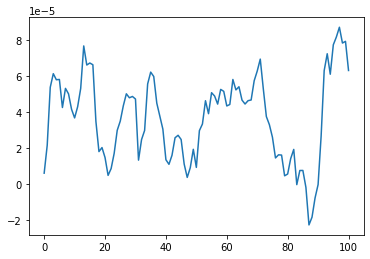

In [92]:
plt.plot(np.mean(d_ft[:,q//2,:]*d_ft[:,q//2,:],axis=0).real)

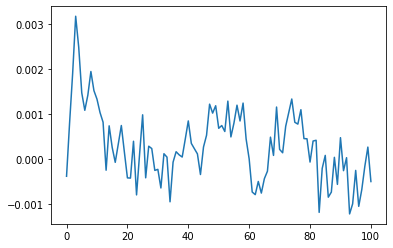

In [94]:
plt.plot(np.mean(d_ft,axis=0)[2*q,:].real)

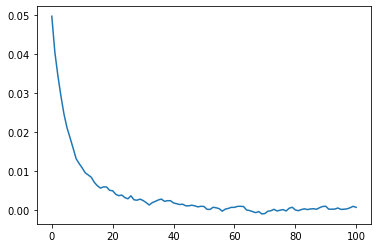

In [90]:
plt.plot(np.mean(d_ft,axis=0)[q,:].real)
#plt.plot(np.mean(d_ft,axis=0)[q//2,:])

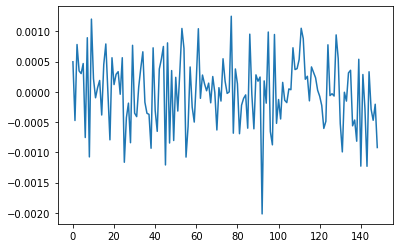

In [91]:
plt.plot(np.mean(d_ft,axis=0)[1:l//2,100].real)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


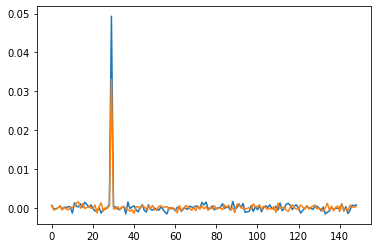

In [76]:
plt.plot(np.mean(d_ft,axis=0)[1:l//2,0])
#plt.plot(np.mean(d_ft,axis=0)[:,10])
#plt.plot(np.mean(d_ft,axis=0)[:,20])
plt.plot(np.mean(d_ft,axis=0)[1:l//2,100])
#plt.plot(rho_in)
#plt.plot(np.fft.ifft(rho_in).real[1:l//2])
#plt.plot(np.mean(d_ft,axis=0)[0,:])
#plt.plot(np.mean(d_ft,axis=0)[1:l//2,0])

In [ ]:
a = np.fft.ifft(d_ft,axis=1)

[[<matplotlib.lines.Line2D at 0x7f98bcc43b80>],

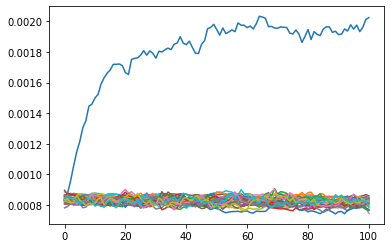

In [36]:
#plt.plot(np.mean(a.real,axis=0)[0,:])
plt.plot(np.mean(d_ft,axis=0)[q,:])
#plt.plot(np.mean(a.real,axis=0)[q//2,:])
[plt.plot(np.mean(d_ft,axis=0)[i,:]) for i in range(1,30)]
#plt.plot(np.mean(a.real,axis=0)[2*q,:])

In [ ]:
plt.plot(np.mean(a.real,axis=0)[:,30])

In [ ]:
plt.plot(np.mean(np.abs(a)**2,axis=0)[q,:])
plt.plot(np.mean(np.abs(a)**2,axis=0)[1,:])